# High-Resolution Deep Convolutional Generative Adversarial Networks
J. D. Curtó, I. C. Zarza, Fernando de la Torre, Irwin King, Michael R. Lyu

## Data Preparation

In [ ]:
from crawler import crawler, purify_sources

# load urls of images into local file
crawler.run()
purify_sources.purify()


In [ ]:
from crawler import downloader

# download actual images into folder
downloader.run()

In [ ]:
from preprocessing import cropper

cropper.crop_to_face()

## Training

In [1]:
import tensorflow as tf
# MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1) / 255.
# x_train = x_train[:500,]
x_train.shape

(60000, 28, 28, 1)

In [2]:
from gan import GAN, DCGAN

gan = DCGAN(shape=(28,28,1))

gan.set_training_data(x_train)

In [ ]:
gan.generator.summary()


In [ ]:
gan.discriminator.summary()

In [26]:
gan.train(epochs=20, iterations_generator=10, iterations_discriminator=10)

EPOCH 1.1 [D] loss: 0.29536154866218567 ; acc: 82.8125
EPOCH 1.2 [D] loss: 0.2600044906139374 ; acc: 86.71875
EPOCH 1.3 [D] loss: 0.2009027600288391 ; acc: 84.375
EPOCH 1.4 [D] loss: 0.21963292360305786 ; acc: 88.28125
EPOCH 1.5 [D] loss: 0.1902366429567337 ; acc: 90.625
EPOCH 1.6 [D] loss: 0.20022161304950714 ; acc: 87.5
EPOCH 1.7 [D] loss: 0.16931280493736267 ; acc: 91.40625
EPOCH 1.8 [D] loss: 0.13898798823356628 ; acc: 91.40625
EPOCH 1.9 [D] loss: 0.11315252631902695 ; acc: 96.875
EPOCH 1.10 [D] loss: 0.06759881973266602 ; acc: 99.21875
EPOCH 1.1 [G] loss: 2.04374098777771
EPOCH 1.2 [G] loss: 1.790434718132019
EPOCH 1.3 [G] loss: 1.3968491554260254
EPOCH 1.4 [G] loss: 0.7666510343551636
EPOCH 1.5 [G] loss: 0.8654811978340149
EPOCH 1.6 [G] loss: 0.6717703342437744
EPOCH 1.7 [G] loss: 0.8919529914855957
EPOCH 1.8 [G] loss: 0.7569372057914734
EPOCH 1.9 [G] loss: 1.0099674463272095
EPOCH 1.10 [G] loss: 0.9960393905639648
EPOCH 2.1 [D] loss: 0.28135946393013 ; acc: 85.9375
EPOCH 2.2 [D]

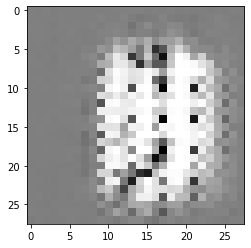

In [35]:
import matplotlib.pyplot as plt

img = gan.generate()
plt.imshow(img[0, :,:,0], cmap='gray')
plt.show()

In [60]:
gan.export("gan/models/dcgan")

In [3]:
gan.import_('gan/models/dcgan')

Loading models from file


In [36]:
import numpy as np
noise = np.random.normal(0, 1, (5, 100))
batch_fake = gan.generator.predict(noise)

res = gan.discriminator.predict(batch_fake)
res

array([[0.87530655],
       [0.51077366],
       [0.6792812 ],
       [0.5340785 ],
       [0.6747369 ]], dtype=float32)

In [37]:
res = gan.discriminator.predict(x_train[0:5])
res

array([[1.3350757],
       [0.9490282],
       [1.4627962],
       [1.0561068],
       [1.207862 ]], dtype=float32)